Problem statement:

To predict the revenue of an ice-cream shop using decision tree regression, based on temperature for 500 days. 

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns

In [12]:
df = pd.read_csv('IceCreamData.csv')
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [14]:
df.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

In [15]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


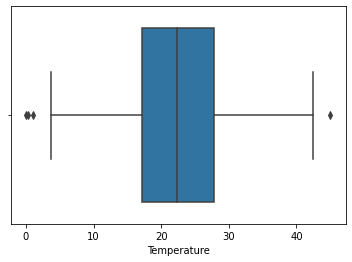

In [16]:
sns.boxplot(x = 'Temperature', data = df)

In [19]:
sns.displot(df['Revenue'], rug=True, hist=False)

AttributeError: module 'seaborn' has no attribute 'displot'

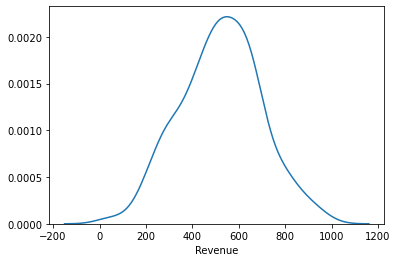

In [24]:
sns.distplot(df['Revenue'], kde = True, hist = False)

In [25]:
df.corr()

,Temperature,Revenue
Temperature,1.000000,0.989802
Revenue,0.989802,1.000000


Near perfect correlation

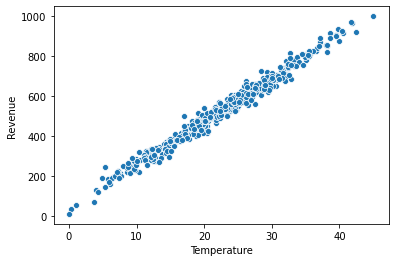

In [28]:
sns.scatterplot(x = 'Temperature', y = 'Revenue' , data= df)

In [35]:
x = pd.DataFrame(df['Temperature'])
y = pd.DataFrame(df['Revenue'])

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor 
model = DecisionTreeRegressor(random_state = 1)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 3)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(350, 1)
(350, 1)
(150, 1)
(150, 1)


In [36]:
model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=1)

In [41]:
from sklearn.metrics import mean_squared_error

print("rmse for train data:",np.sqrt( mean_squared_error (y_train, model.predict(x_train))))
print("rmse for test data:",np.sqrt( mean_squared_error (y_test, model.predict(x_test))))

rmse for train data: 0.0
rmse for test data: 35.079674867045675


In [42]:
y_pred = model.predict(x_test)